In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from sklearn.metrics import accuracy_score

df = pd.read_csv('dados.csv')

print(df.isna().sum())

df.replace({'Y':1, 'N':0},inplace=True)
dummies = pd.get_dummies(df[['tipo_renda','educacao','estado_civil','tipo_residencia','sexo']],drop_first=True)
df_dum = df.drop(columns=['tipo_renda','educacao','estado_civil','tipo_residencia','sexo'])
df_dum = pd.concat([df_dum,dummies],axis = 1)

print(df_dum.dtypes)
print(df_dum)

X = df_dum.drop('mau',axis = 1).values
y = df_dum[['mau']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=17)


def plot_confusion_matrix(y, y_pred, classes = None):
    if classes is None:
        classes = ['reprovado', 'aprovado']
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels= classes, yticklabels= classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_

In [30]:
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,1,1,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,1,1,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,1,0,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,0,1,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,0,1,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,1,1,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,1,1,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


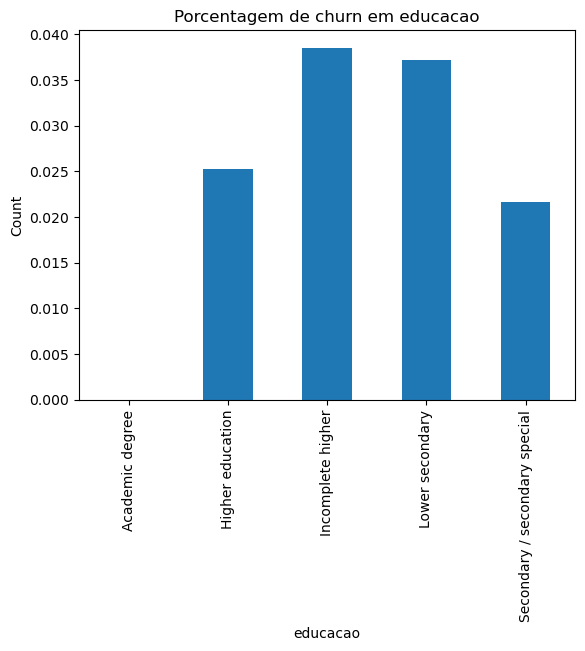

In [31]:
def bar_column(column):
    (df[df['mau'] == True][column].value_counts()/df[column].value_counts()).plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Porcentagem de churn em {column}')


#escolha a coluna
bar_column('educacao')
plt.show()

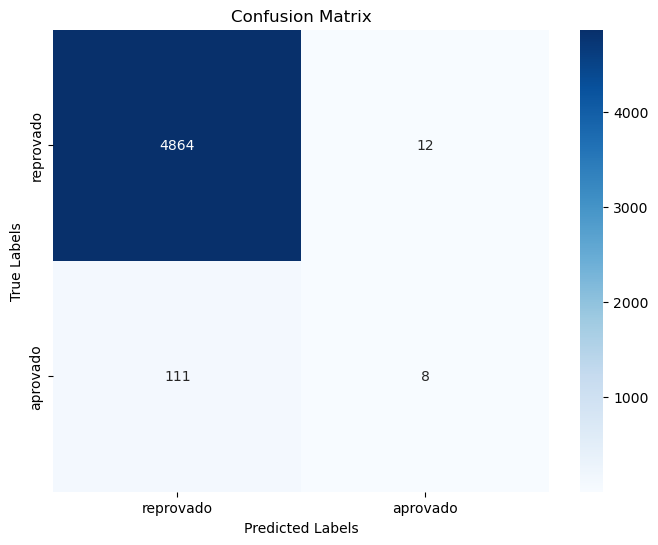

0.9753753753753753


In [32]:
dt_p = DecisionTreeClassifier(min_samples_leaf = 5,max_depth = 10,random_state = 123)
dt_p.fit(X_train,y_train)
y_pred = dt_p.predict(X_test)
plot_confusion_matrix(y_test,y_pred,['reprovado','aprovado'])
plt.show()
print(accuracy_score(dt_p.predict(X_test),y_test))